In [19]:
import numpy as np

def f(x):
    # Funksjonen
    return np.sin(x**2)

a = 0.5
b = 1.5      # Grenser
N = 20       # Rektangel
dx = (b-a)/N # Breidde
integral = 0

for n in range(1, N+1):
  x = a+(n-0.5)*dx            # Oppdaterar x
  integral = integral+f(x)*dx # Legg til areal

print(integral)        # Skriv svar til skjerm

0.7370540535373423


In [3]:
def riemann_funk_V(funk, a, b, N):
    """Funksjonsfil som estimerar eit integral
    
    som ein Riemann-sum på ein regulær partisjon med venstre-
    seleksjon.
    Integranden og grenser er hard-koda, input er
    N, talet på del-intervall.
    """
    
    # Oppdeling
    delta_x = (b-a)/N
    
    # Initerar summen:
    R = 0
    
    # Reknar ut summen
    for n in range(1, N+1):
        x = a+(n-1)*delta_x             # Oppdaterar x
        R = R+delta_x*funk(x)           # Oppdaterar summen

    return R

def trapes_funk(funk, a, b, N):
    """Implementering av trapesmetoden for numerisk integrasjon.
    
    Integranden funk, grensene a og b, og oppdelinga N
    blir gitt som input.
    """
    
    # Steglengda
    h = (b-a)/N
    
    # Bidrag frå endane
    T = h/2*(funk(a)+funk(b))
    
    # Resten av bidraga
    for i in range(1, n):
        xi = a+i*h
        T = T+h*funk(xi)

    return T

def simpsons_funk(funk, a, b, N):
    """Funksjonsfil som estimerar eit integral 
    ved hjelp av Simpsons metode.
    Integranden og grenser er hard-koda, input er
    N, talet på del-intervall.
    """
    
    # Oppdeling
    delta_x = (b-a)/N
    
    # Initerar summen og tar med endane:
    S = (funk(a)+funk(b))
    
    # Oddetalsbidrag
    for n in range(1, N, 2):
        x = a+n*delta_x           # Oppdaterar x
        S = S+4*funk(x)           # Oppdaterar summen
    
    # Partalssbidrag
    for n in range(2, N-1, 2):
        x = a+n*delta_x           # Oppdaterar x
        S = S+2*funk(x)           # Oppdaterar summen
    
    # Korrigerar svar med delta_x/3
    S = S*delta_x/3
    
    return S

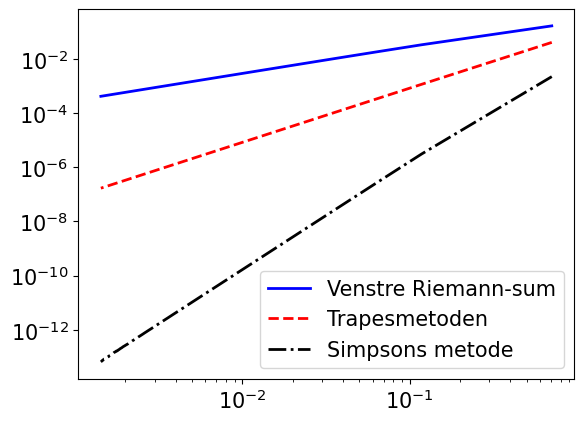

In [27]:
"""Implementering som plottar feilen i eit estimat
for ein Riemann-sum, trapesmetoden og Simpsons metode.
"""

import numpy as np
import matplotlib.pyplot as plt

def funk(x):
    """Integrand"""
    return np.sqrt(4-x**2)

a = 0
b = np.sqrt(2)
fasit = 1 + np.pi*0.5

# Lagar vektor med n-verdiar
n_start = 2
n_steg = 10
n_slutt = 1000
n_vektor = np.arange(n_start, n_slutt+1, n_steg)
h_vektor = (b-a)/n_vektor

V_vektor = np.zeros_like(h_vektor)
T_vektor = np.zeros_like(h_vektor)
S_vektor = np.zeros_like(h_vektor)

# Lagar vektorar med estimat
indeks = 0
for n in n_vektor:
    V_vektor[indeks] = riemann_funk_V(funk, a, b, n)
    T_vektor[indeks] = trapes_funk(funk, a, b, n)
    S_vektor[indeks] = simpsons_funk(funk, a, b, n)
    indeks = indeks+1

# Plottar feilen
plt.rcParams.update({'font.size': 15})
plt.loglog(h_vektor, abs(V_vektor-fasit), 'b-', linewidth=2, 
           label='Venstre Riemann-sum')
plt.loglog(h_vektor, abs(T_vektor-fasit), 'r--', linewidth=2,
           label='Trapesmetoden')
plt.loglog(h_vektor, abs(S_vektor-fasit), 'k-.', linewidth=2,
           label='Simpsons metode')

plt.legend(loc='lower right')
plt.show()